The field of Natural Language Processing(NLP) is one of the booming areas from Artificial Intelligence. It deals with the understanding of language, something very intimate to humans, and promises to deliver some of the most needed features for a AGI (Artificial general Intelligence) be possible. Nodoways though, its application is not restricted to academic research only, for many IT giants such as Amazon and Netflix are using extensivily techniques from this field. As the field envolves, it is becomming more accessible for enterprises and even personal business to benefit from the exciting advances this field has * in the last years.

There are many interesting tasks that NLP address, with most know ones being document classification, sentiment analyses, natural language generation, among others. These tasks can be modeled as a multitude of problems, such as spam mail filtering, user review filtering, user review sentiment analyse, chatbots for ansewring questions and interacting with a user, and many others.

In this tutorial we introduce one of most common NLP and Text Mining tasks, that of Document classification. Note that while being common, it is far from useless, as the problem of classifiying content is a constant hurdle we humans face every day. It is important to know basic elements from this problem, since many of it can be used for other tasks such as sentiment analysis.

We will be playing* with a real world problem, that of document classification of the Amazon reviews dataset. This dataset has reviews for many categories from the amazon website, along with information of these reviews, such as usefulness and score of tre product being reviewed. We will train and try to classify reviews from different categories.

Tutorial contents:<br>
    - Data loading and visualization.
    - Text pre-processing.
    - Classification.

# Data loading and visualization.

The Amazon review dataset has a large corpus of reviews raging from 10mb to 10gb, from diverse categories such as automobile-related to musical-instrument-related. To load these datasets we install the pandas library. Pandas has a nice format for handling small and big datasets, with extensive documentation we recommend you guys to check its documentation. Just a [pip install pandas] is enough to install it and its dependencies. 

To download the dataset check this link: http://jmcauley.ucsd.edu/data/amazon/ . For this tutorial, we will explore subsets of the following datasets: 
    - The Amazon Instant Video Dataset
    - The Automative Dataset
    - The Musical Instruments Dataset
    - The Office Product Dataset
    - The Patio Lawn and Garden Dataset
    
To load them in dataframes the website provide us with the following functions:

In [1]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path): 
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

We need the datasets downloaded locally in the same folder as the script.
For this tutorial, we will work with the first thousand reviews from each of the categories we talked before. We see this number as significant for a introduction, since it does not need too much ram memory for processing. The following code shows this process:

In [2]:
video_data = getDF('reviews_Amazon_Instant_Video_5.json.gz')
automotive_data = getDF('reviews_Automotive_5.json.gz')
musical_data = getDF('reviews_Musical_Instruments_5.json.gz')
office_data = getDF('reviews_Office_Products_5.json.gz')
patio_data = getDF('reviews_Patio_Lawn_and_Garden_5.json.gz')

frames = [video_data.reviewText[:1000],automotive_data.reviewText[:1000], \
          musical_data.reviewText[:1000],office_data.reviewText[:1000],\
          patio_data.reviewText[:1000]]
complete_data = pd.concat(frames, keys = ['video','auto','musical','office','patio'])
#ignore_index = True,

labels = []
for i in range(5):
    labels += [i] * 1000
video_data,automotive_data,musical_data,office_data,patio_data = [],[],[],[],[]

In add to loading the datasets, we created labels for the 5 categories (0,1,2,3,4), where there is a thousand for each category.

You can check the datasets through the keys defined in the concatenation process. Changing the key changes the category, and the following index changes the review. As an example we see the first review in the video category:

In [21]:
complete_data.loc['video'][0]

"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all."

When dealing with datasets containing many words, it is important to have some statistical analysis, so we understand better the problem we have in our hands. We check the datasets through the wordCloud library, with that we can visualize the most common words from the categories. We convert each dataset to a string contained all reviews from its category, and feed them to the wordcloud, that will calculate the frequency of the words. We plot with matplotlib. Both libraries can be installed with:<br>
*pip install wordcloud* <br>
*pip install matplotlib* <br>
They will install the libraries and the dependencies. In the following code we loop through the datasets outputing the wordcloud of word frequencies:

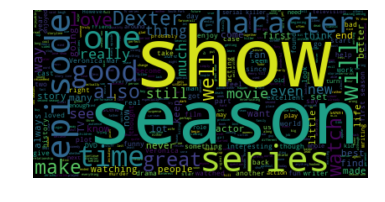

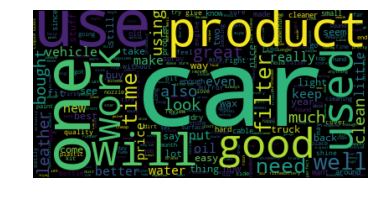

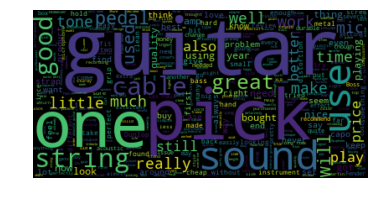

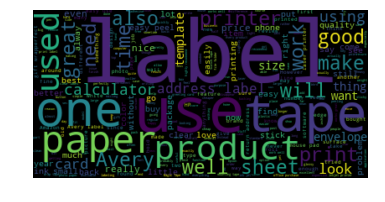

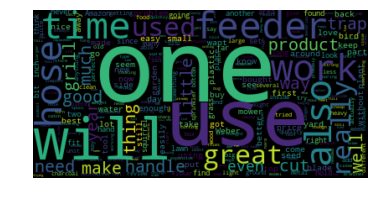

In [9]:
from wordcloud import WordCloud
import PIL
import itertools
import matplotlib.pyplot as plt


reviews_names = ['video','auto','musical','office','patio']
for reviews,name in zip(frames,reviews_names):
    raw_str = complete_data.loc[name].str.cat(sep=',')
    wordcloud = WordCloud( max_words=1000,margin=0).generate(raw_str)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

We observe that for all categories there are some frequent words that represent them. For example, we see many related words such as 'season', 'show', and 'character' for the video category. For the automobile category there is 'car', and for musical there is 'guitar','sound', 'string', etc. 

We see too that the words 'use', 'used', 'one', 'will' and others are frequents, while not being too much representing of the datasets. Some or all of these word can be removed if denmed* necessary, through the use of stop words, explained in the next section.  

# Preprocessing

Before using the dataset for learning methods, there is the need to preprocess it by removing words that do not help in the classification process. These words are called **stopwords**, and they are most commonly function words such as 'is', 'the', 'that', or ponctuation. We usually use a list of **stopwords** already collected by someone, and in our case we use the NLTK stopwords list with 153 items. There isn't a perfect stopword list, in many cases one has to manually create one. The stopword list we choose is small compared to many others out there, but it contais the most common words that might prejudice in the classification later. We can also extend the stopword list with the words we do not agree to be characteristic of the category in the wordcloud, thought one need to be cautious about it.

In [11]:
stop_words =['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself',
            'yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself',
            'they','them','their','theirs','themselves','what','which','who','whom','this','that',
            'these','those','am','is','are','was','were','be','been','being','have','has','had',
            'having','do','does','did','doing','a','an','the','and','but','if','or','because','as',
            'until','while','of','at','by','for','with','about','against','between','into','through',
            'during','before','after','above','below','to','from','up','down','in','out','on','off',
            'over','under','again','further','then','once','here','there','when','where','why','how',
            'all','any','both','each','few','more','most','other','some','such','no','nor','not',
            'only','own','same','so','than','too','very','s','t','can','will','just','don','should',
            'now','uses','use','using','used','one','also']

We added the words 'uses','use','using','used','one','also' to the list, as they don't seem to too much of help in the document classification context, where we need words more unique to each category. 

Other than the **stopwords**, we enforce all words to be on lowercase, and remove ponctuation. We also do the *tonkenization* process, where all text is divided in parts(words normally). We return these tokens of each dataset for future use in the classification. 

In [12]:
def preprocess(data):
    reviews_tokens = []
    for review in data:
        review = review.lower()
        raw_word_tokens = re.findall(r'(?:\w+\'\w+|\w+)', review,flags = re.UNICODE) #remove pontuaction
        #stop_words = list(stopwords.words('english')) #About 150 stopwords
        word_tokens = [w for w in raw_word_tokens if not w in stop_words]
        reviews_tokens.append(word_tokens)
    return reviews_tokens

We can now check how the datasets are again in the wordcloud:

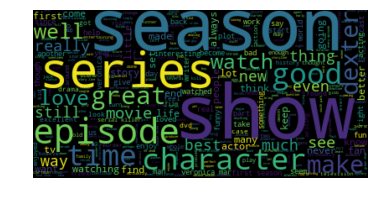

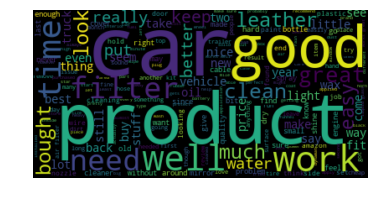

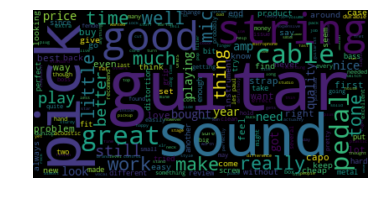

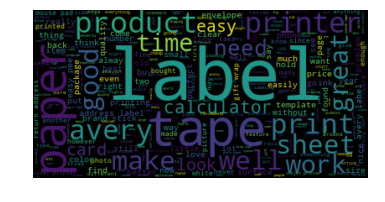

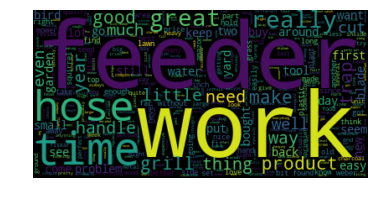

In [14]:
import itertools
import re

reviews_names = ['video','automotive','musical','office','patio']
for reviews,name in zip(frames,reviews_names):
    tokenized_reviews = preprocess(reviews)
    reviews = list(itertools.chain(*tokenized_reviews))
    text_reviews = " ".join(reviews)
    wordcloud = WordCloud( max_words=1000,margin=0).generate(text_reviews)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    #image = wordcloud.to_image()
    #image.show()
    #image.save(name+'.bmp')

# Classification

For the classification step it is really hard to and innapropirate to just feed list of token with thousand words to the classification model. So, before the classification we need to transform the tokens dataset to more compress and understendable* information for the model. This process is called featurization or feature extraction. We choose the method of BoW(Bag of Words) for this end.

BoW is a simple but effective method for feature extraction. It works as follow: Given the set of reviews/texts from one user, know as document, we define as 'vocabulary' all distinct words in the set of all review texts from all category. The bag of words model, for each review/sentence, computes a feature vector that saves the vocabulary order. A simple illustration of document and features is as follow:

    - document d1 = ['dog', 'eats', 'meat']
    - document d2 = ['cat', 'eats', 'fish']
    
The vocabulary will be:
    - vocabulary = {'dog','cat','eats','meat','fish'}
and the features for each documents are:
    - features f1 = [1, 0, 1, 1, 0]
    - features f2 = [0, 1, 1, 0, 1] 

The Bow then is nothing more than a dictionary that saves the order of the documents:<br>

    - {'dog':0 , 'cat':1, 'eats':2, 'meat':3, 'fish':4}
    
The code for building a basic Bow model is show as:



In [ ]:
def construct_bag_of_words(data):
    corpus = preprocess(data)
    bag_of_words = {}
    word_count = 0
    for sentence in corpus:
        for word in sentence:
            if word not in bag_of_words:
                bag_of_words[word] = word_count
                word_count+=1
            
    #print(dict(Counter(bag_of_words).most_common(5)))
    return bag_of_words #index of letters

bag_of_words = construct_bag_of_words(complete_data)

The process of feature extraction, and collection of features from all dataset is as follow:

In [ ]:
def featurize(sentence_tokens,bag_of_words):
    sentence_features = [0 for x in range(len(bag_of_words))]

    for word in sentence_tokens:
        index = bag_of_words[word]
        sentence_features[index] +=1
    return sentence_features

def get_batch_features(data,bag_of_words):
    batch_features = []
    reviews_text_tokens = preprocess(data)
    for review_text in reviews_text_tokens:
        feature_review_text = featurize(review_text,bag_of_words)
        batch_features.append(feature_review_text)
    return batch_features

batch_features = get_batch_features(complete_data,bag_of_words)

For each review text, the method get_batch_features transform it in features, and append to the batch. This process repeats till there is no more reviewes texts.

We then have collected all features from the datasets. For the classification step we make use of a handy library for text processing and NLP: Scikit learn. Scikit is one of standard tools for text processing, NLP and Machine learning. It eases the development of NLP applications, and has a plethora of Machine Learning models and tools.

To install it just do *pip install sklearn* , it uses as dependecies the numpy and scipy libraries.

We divide the batch of features along with the created labels through the train_test_split, that give us a train and test set, along with the corresponding labels.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( batch_features, labels, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from time import time
from sklearn import metrics


clf = Perceptron(n_iter=50)
#clf = MultinomialNB(alpha=.01)

t0 = time()
clf.fit(X_train, y_train)
train_time = time() - t0
print("train time: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(X_test)
test_time = time() - t0
print("test time:  %0.3fs" % test_time)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

We see that the classification model *Perceptron* give us an accuracy of 91%, not bad.

Lastly we show the usefulness of the scikit library, by redoing the complete document classification  using this library only.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from time import time
from sklearn import metrics

from sklearn.model_selection import train_test_split

import pandas as pd
import gzip
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier



def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path): 
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

video_data = getDF('reviews_Amazon_Instant_Video_5.json.gz')
automotive_data = getDF('reviews_Automotive_5.json.gz')
musical_data = getDF('reviews_Musical_Instruments_5.json.gz')
office_data = getDF('reviews_Office_Products_5.json.gz')
patio_data = getDF('reviews_Patio_Lawn_and_Garden_5.json.gz')

frames = [video_data.reviewText[:1000],automotive_data.reviewText[:1000], \
          musical_data.reviewText[:1000],office_data.reviewText[:1000],\
          patio_data.reviewText[:1000]]
complete_data = pd.concat(frames, keys = ['video','auto','musical','office','patio'])
labels = []
for i in range(5):
    labels += [i] * 1000
video_data,automotive_data,musical_data,office_data,patio_data = [],[],[],[],[]

X_train, X_test, y_train, y_test = train_test_split( complete_data, labels, test_size=0.33, random_state=42)
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Uncomment to test others classifiers
#clf = Perceptron(n_iter=50)
#clf = BernoulliNB(alpha=.01)
clf = MultinomialNB(alpha=.01)
#clf = RandomForestClassifier()

print("n_samples: %d, n_features: %d" % X_train.shape)

t0 = time()
clf.fit(X_train, y_train)
train_time = time() - t0
print("train time: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(X_test)
test_time = time() - t0
print("test time:  %0.3fs" % test_time)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

n_samples: 3350, n_features: 16587
train time: 0.005s
test time:  0.001s
accuracy:   0.946


The best results from the models we tried comes from the Multinomial Naives Bayes method, resulting in 94,6% of accuracy. You guys can try other models to see if it can get a better result.

And that's all for now! We will futurely approach in more depth how to deal with bigger datasets for many NLP problems.